# TITANIC SHIP CASE STUDY

## 2.loading dataset

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [47]:
# reading data from csv file
dataset = pd.read_csv("C:/Users/Ragavarshini/Dropbox/My PC (LAPTOP-7LQ4HL1A)/Downloads/titanic.csv")

In [48]:
display(dataset)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 3.perform visualization

## a) Univariate Analysis: 

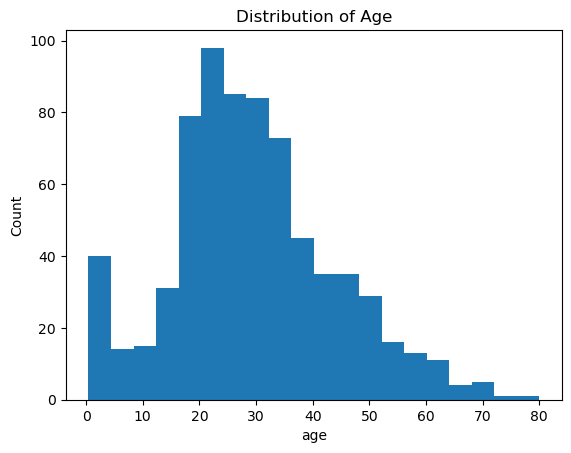

In [49]:
# Create a histogram for the 'Age' variable
plt.hist(dataset['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

## b) Bi-Variate Analysis:

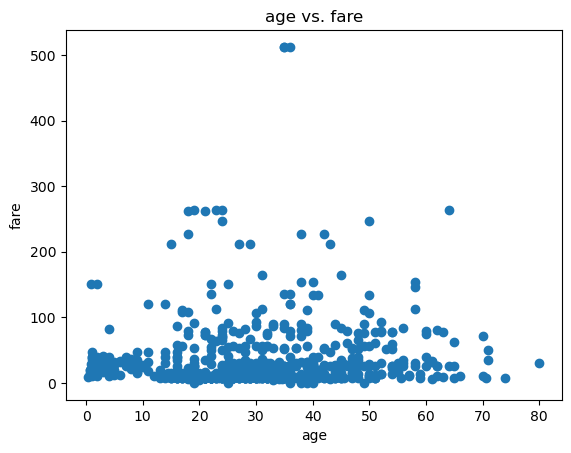

In [50]:
# Create a scatter plot of age vs. fare
plt.scatter(dataset['age'], dataset['fare'])
plt.xlabel('age')
plt.ylabel('fare')
plt.title('age vs. fare')
plt.show()

## c) Multi-Variate Analysis: 

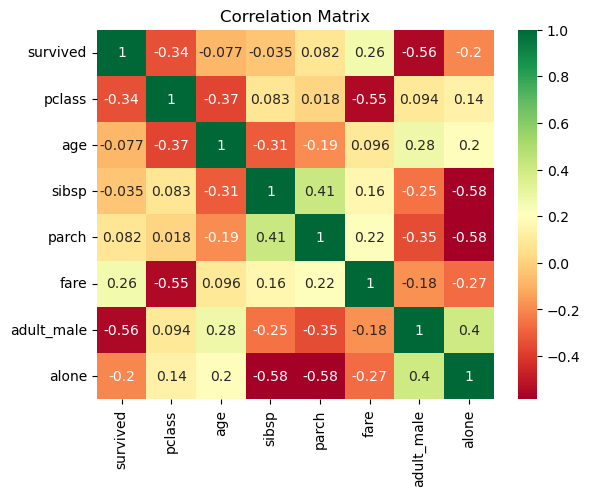

In [51]:
# Create a correlation matrix
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

## 4.Perform descriptive statistics on the dataset.

In [52]:
# Get descriptive statistics for numerical variables
numeric_stats = dataset.describe()
print(numeric_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## 5.Handle the Missing values

In [53]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## 6.Find the outliers and replace the outliers

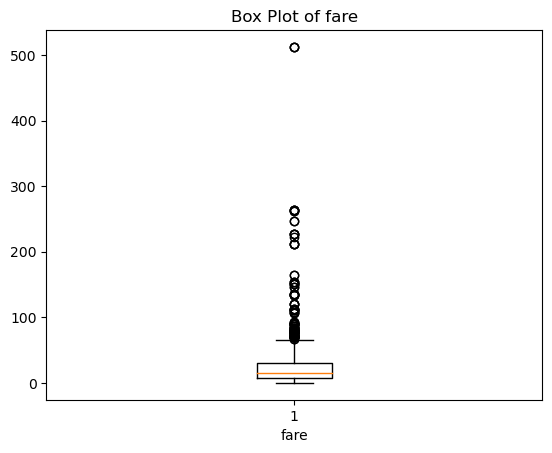

In [54]:
# Create a box plot for the 'Fare' variable
plt.boxplot(dataset['fare'])
plt.xlabel('fare')
plt.title('Box Plot of fare')
plt.show()

## 7.Check for Categorical columns and perform encoding

In [55]:
# Perform one-hot encoding on the 'Sex' column
dataset_encoded = pd.get_dummies(dataset, columns=['sex'])

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.sex = le.fit_transform(dataset.sex)
dataset.embarked = le.fit_transform(dataset.embarked)
dataset['target'] = le.fit_transform(dataset['class'])
dataset.adult_male = le.fit_transform(dataset.adult_male)
dataset.deck = le.fit_transform(dataset.deck)
dataset.embark_town = le.fit_transform(dataset.embark_town)
dataset.alive = le.fit_transform(dataset.alive)
dataset.alone = le.fit_transform(dataset.alone)

## 8.Split the data into dependent and independent variables.


In [56]:
# Split the data into dependent and independent variables
X = dataset.drop('survived', axis=1)  # Independent variables (features)
y = dataset['survived']  # Dependent variable (target)

In [31]:
display(dataset)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [69]:
# Dependent/Target variable y
y = dataset['survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [70]:
# Independent/Predictor variable x
x = dataset.drop(columns=['survived'],axis=1)
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 9. Scale the independent variables

In [71]:
# Minmax Scaling (Scaling values between 0 and 1)
name = x.columns
name

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [96]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)
x_scaled

ValueError: could not convert string to float: 'male'

## 10. Split the data into training and testing

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [100]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
140,3,female,NaN,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,no,False
439,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
817,2,male,31.0,1,1,37.0042,C,Second,man,True,NaN,Cherbourg,no,False
378,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
491,3,male,21.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
x_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
495,3,male,NaN,0,0,14.4583,C,Third,man,True,NaN,Cherbourg,no,True
648,3,male,NaN,0,0,7.5500,S,Third,man,True,NaN,Southampton,no,True
278,3,male,7.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
31,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
255,3,female,29.0,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,yes,False


In [102]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64

In [103]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 712, dtype: int64